In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [3]:
gDNA_c_file = '/project2/kribelba_1515/saadawy/barcode_gDNA_counts_dataset2.tsv'
mRNA_c_file = '/project2/kribelba_1515/saadawy/barcode_mRNA_counts_dataset2.tsv'
barcode_mapping_file = '/project2/kribelba_1515/saadawy/mapping_filtered_dataset2.tsv'

In [4]:
gDNA_counts = pd.read_csv(gDNA_c_file, sep='\t')
mRNA_counts = pd.read_csv(mRNA_c_file, sep='\t')
barcode_mapping = pd.read_csv(barcode_mapping_file, sep='\t')

In [5]:
gDNA_counts

,sequence,gDNA_rep1,gDNA_rep2,gDNA_rep3
0,GTGGCNTAACCA,1,0,0
1,TCTCTNACATGC,1,0,0
2,CGTTCNGATCAG,1,0,0
3,GTAAANCTGGTC,1,0,0
4,AGGGANCGGCAT,2,0,0
...,...,...,...,...
378319,CAAACCACGGAC,0,0,1
378320,AGACGCTATCAG,0,0,1
378321,CATAGCAAGAGC,0,0,1
378322,TGGCCGGGAAGC,0,0,1


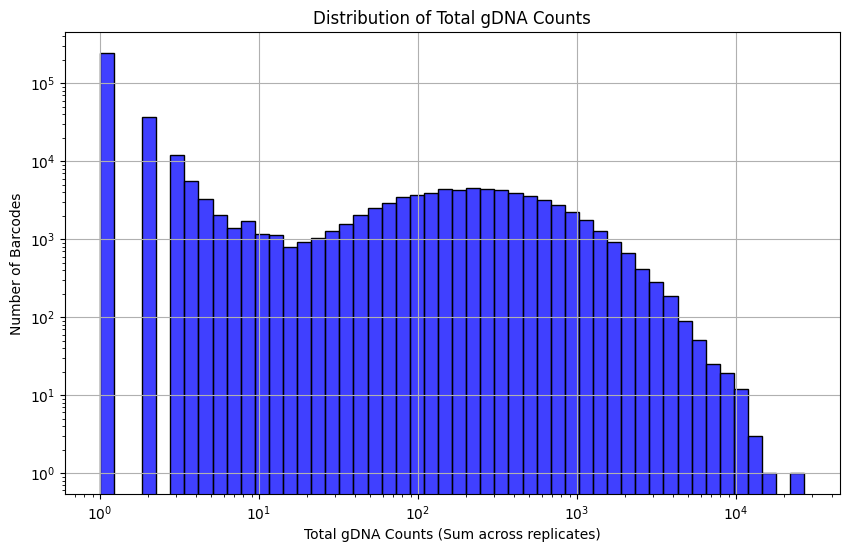

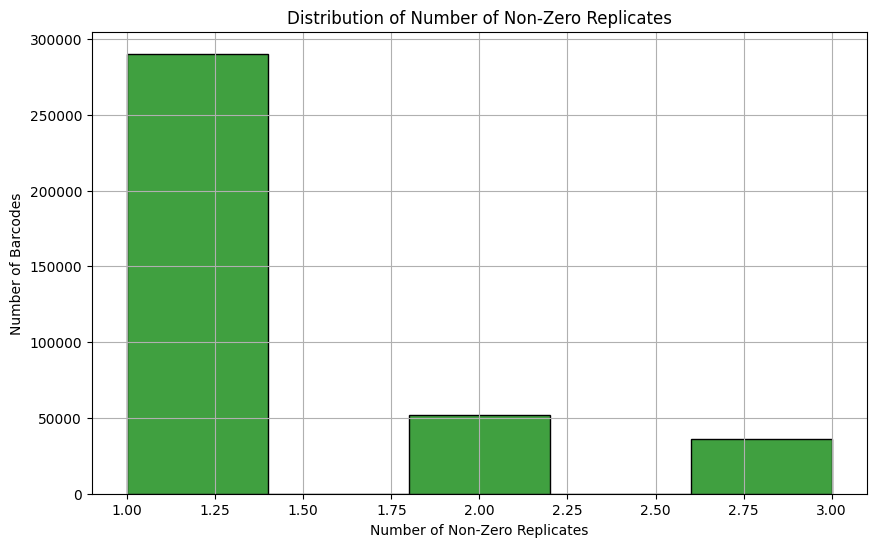

In [6]:
gDNA_visualization = gDNA_counts.copy()
gDNA_replicate_cols = ['gDNA_rep1', 'gDNA_rep2', 'gDNA_rep3']
gDNA_visualization['Total_gDNA_Count'] = gDNA_visualization[gDNA_replicate_cols].sum(axis=1)
gDNA_visualization['Number_Non_Zero_Replicates'] = (gDNA_visualization[gDNA_replicate_cols] > 0).sum(axis=1)

plt.figure(figsize=(10, 6))
sns.histplot(gDNA_visualization['Total_gDNA_Count'], bins=50, color='blue', kde=False, log_scale=(True))

plt.xlabel('Total gDNA Counts (Sum across replicates)')
plt.ylabel('Number of Barcodes')
plt.title('Distribution of Total gDNA Counts')

plt.xticks()
plt.yticks()
plt.yscale('log')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(gDNA_visualization['Number_Non_Zero_Replicates'], bins=5, color='green', kde=False)

plt.xlabel('Number of Non-Zero Replicates')
plt.ylabel('Number of Barcodes')
plt.title('Distribution of Number of Non-Zero Replicates')
plt.grid(True)

plt.show()

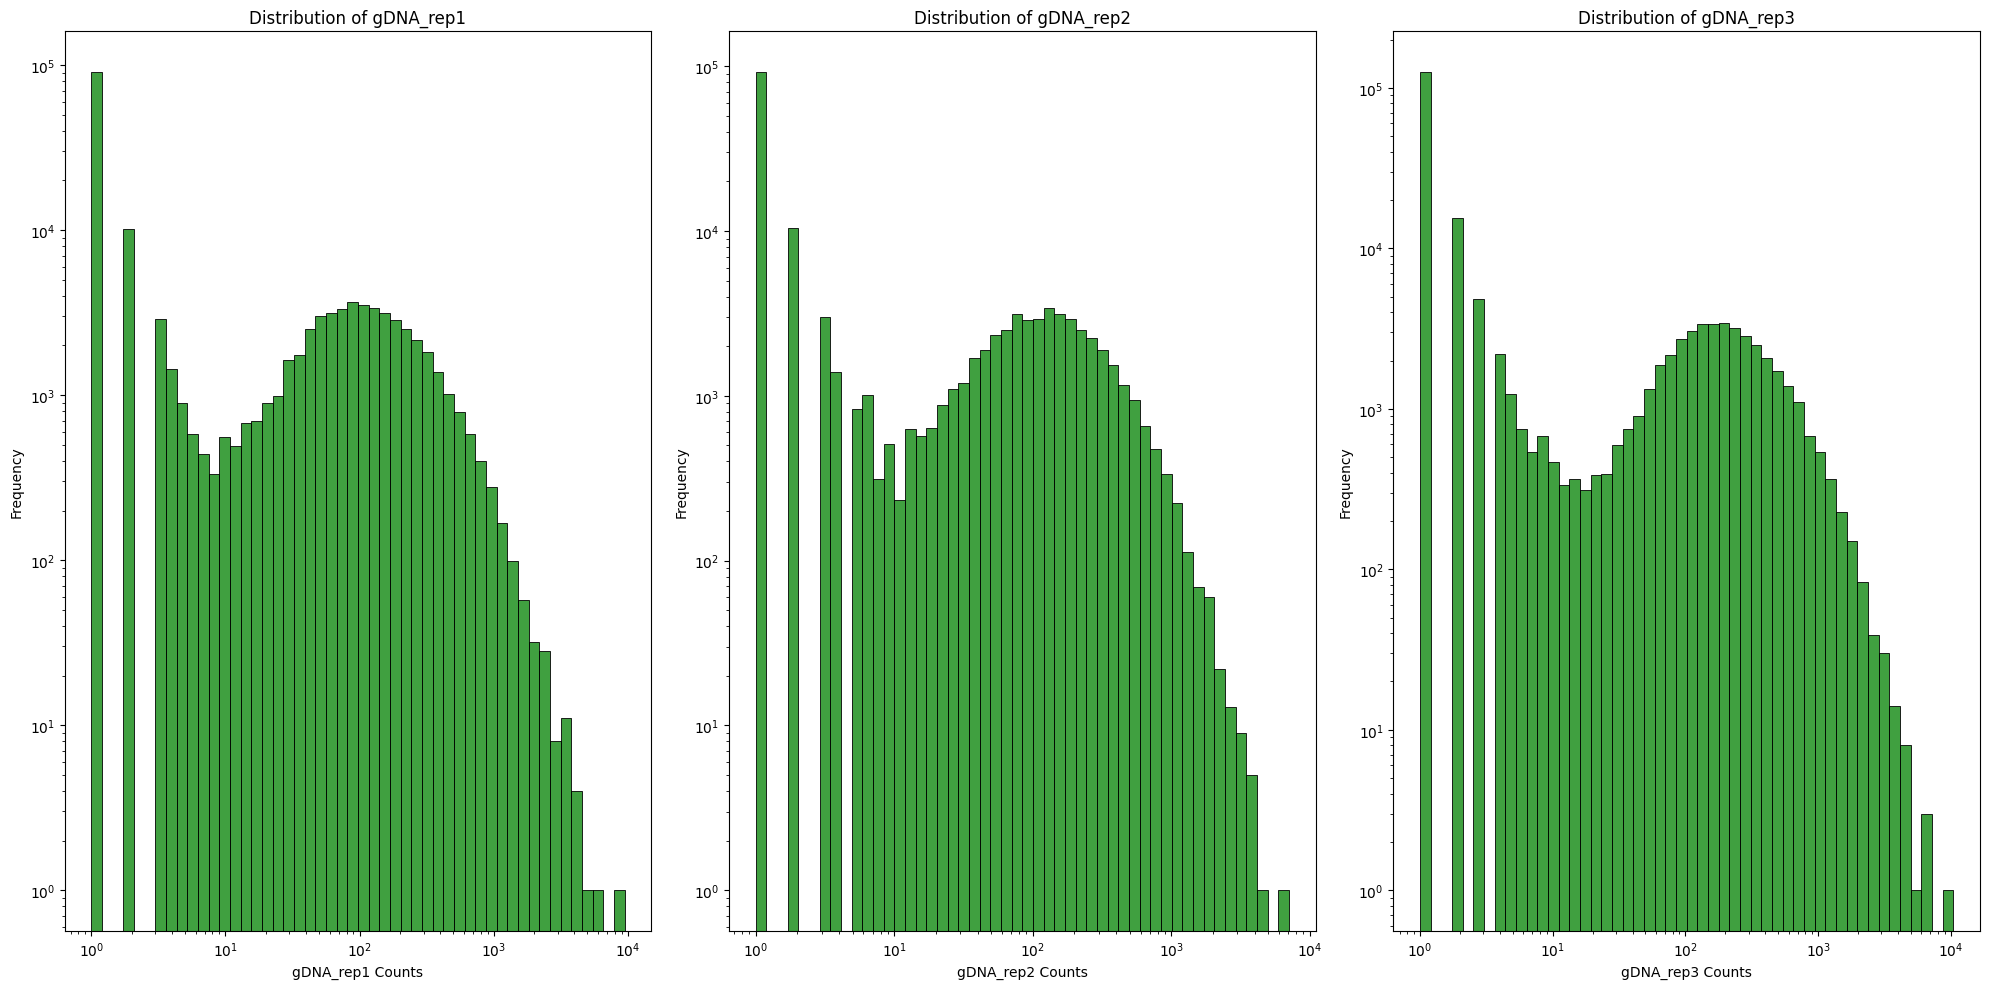

In [12]:
plt.figure(figsize=(20, 10))

for i, col in enumerate(gDNA_replicate_cols, 1):
    plt.subplot(1, 3, i)
    sns.histplot(gDNA_visualization[col], bins=50, color='green', kde=False, log_scale=True)
    plt.title(f"Distribution of {col}")
    plt.xlabel(f'{col} Counts')
    plt.ylabel('Frequency')
    plt.yscale('log')

plt.tight_layout()
plt.show()

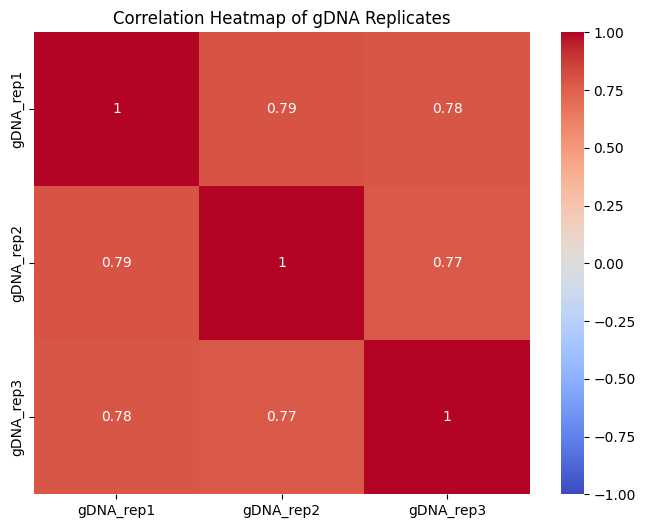

In [13]:
corr_matrix = gDNA_visualization[gDNA_replicate_cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, vmin=-1, vmax=1)

plt.title('Correlation Heatmap of gDNA Replicates')

plt.show()

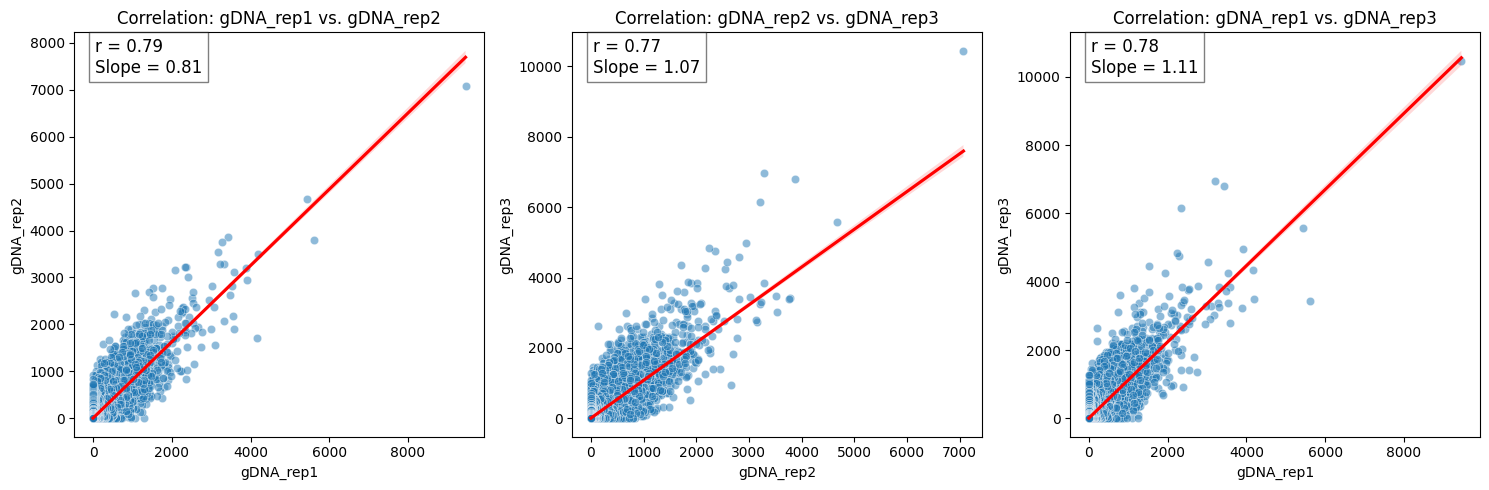

In [14]:
replicate_pairs = [("gDNA_rep1", "gDNA_rep2"), 
                   ("gDNA_rep2", "gDNA_rep3"), 
                   ("gDNA_rep1", "gDNA_rep3")]

plt.figure(figsize=(15, 5))

for i, (rep1, rep2) in enumerate(replicate_pairs, 1):
    plt.subplot(1, 3, i)
    sns.scatterplot(x=gDNA_counts[rep1], y=gDNA_counts[rep2], alpha=0.5)
    
    sns.regplot(x=gDNA_counts[rep1], y=gDNA_counts[rep2], scatter=False, color="red")

    r_value, p_value = stats.pearsonr(gDNA_counts[rep1], gDNA_counts[rep2])
    slope, intercept, _, _, _ = stats.linregress(gDNA_counts[rep1], gDNA_counts[rep2])

    plt.text(0.05, 0.9, f"r = {r_value:.2f}\nSlope = {slope:.2f}", 
             transform=plt.gca().transAxes, fontsize=12, 
             bbox=dict(facecolor='white', alpha=0.5))
    
    plt.xlabel(rep1)
    plt.ylabel(rep2)
    plt.title(f"Correlation: {rep1} vs. {rep2}")

plt.tight_layout()
plt.show()

In [15]:
mRNA_counts

,sequence,mRNA_rep1,mRNA_rep2,mRNA_rep3
0,GCAACNATAATA,770,1403,631
1,TAAGGNACTGTG,19,26,8
2,TATATNTTTAAA,3,0,0
3,CCCAGNCAGCAT,8,12,5
4,CACGCNAAGTAA,1,0,1
...,...,...,...,...
205857,TTACAATCTAAG,0,0,1
205858,CGCTCGCGGAGT,0,0,1
205859,ACTTTATTCACG,0,0,1
205860,TCTAGTACCTTC,0,0,1


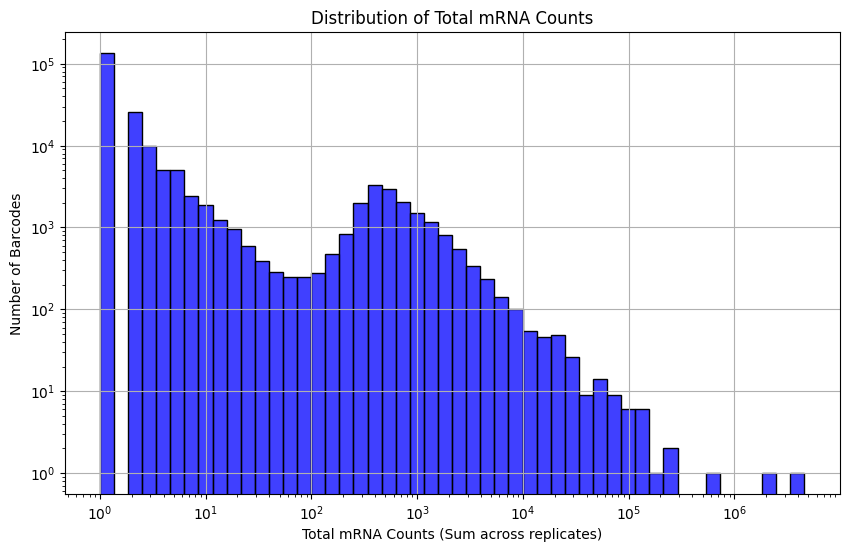

In [16]:
mRNA_visualization = mRNA_counts.copy()
mRNA_replicate_cols = ['mRNA_rep1', 'mRNA_rep2', 'mRNA_rep3']

mRNA_visualization['Total_mRNA_Count'] = mRNA_visualization[mRNA_replicate_cols].sum(axis=1)

plt.figure(figsize=(10, 6))
sns.histplot(mRNA_visualization['Total_mRNA_Count'], bins=50, color='blue', kde=False, log_scale=True)

plt.xlabel('Total mRNA Counts (Sum across replicates)')
plt.ylabel('Number of Barcodes')
plt.title('Distribution of Total mRNA Counts')

plt.xticks()
plt.yticks()
plt.yscale('log')
plt.grid(True)
plt.show()

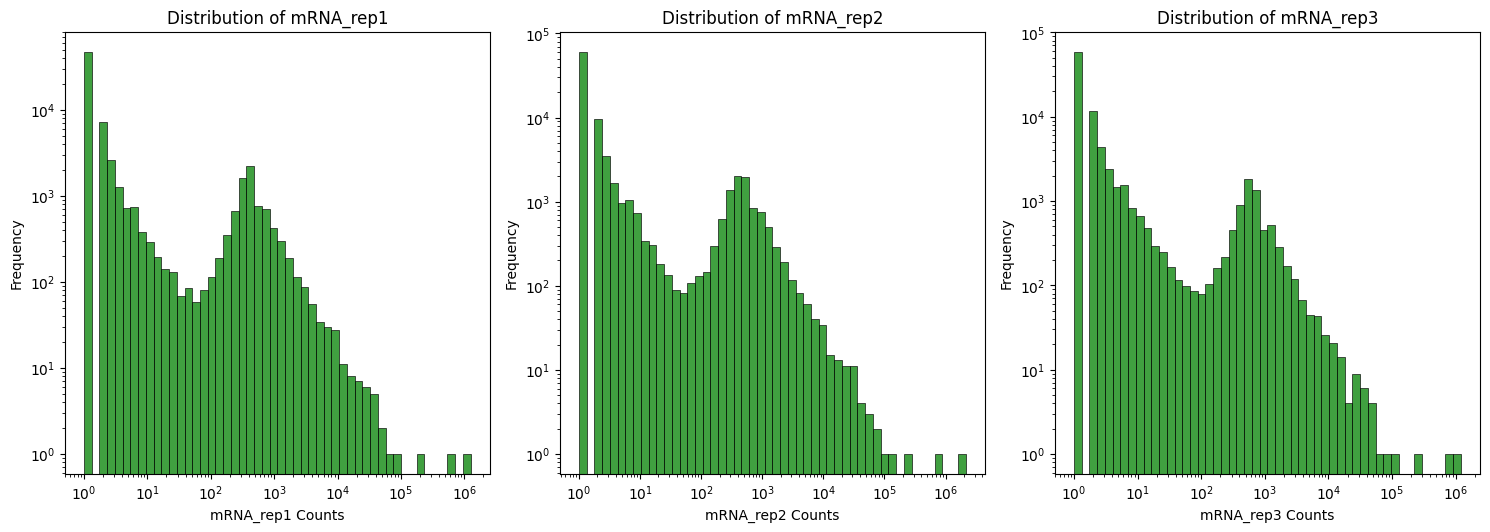

In [17]:
plt.figure(figsize=(15, 10))

for i, col in enumerate(mRNA_replicate_cols, 1):
    plt.subplot(2, 3, i)
    sns.histplot(mRNA_visualization[col], bins=50, color='green', kde=False, log_scale=True)
    plt.title(f"Distribution of {col}")
    plt.xlabel(f'{col} Counts')
    plt.ylabel('Frequency')
    plt.yscale('log')

plt.tight_layout()
plt.show()

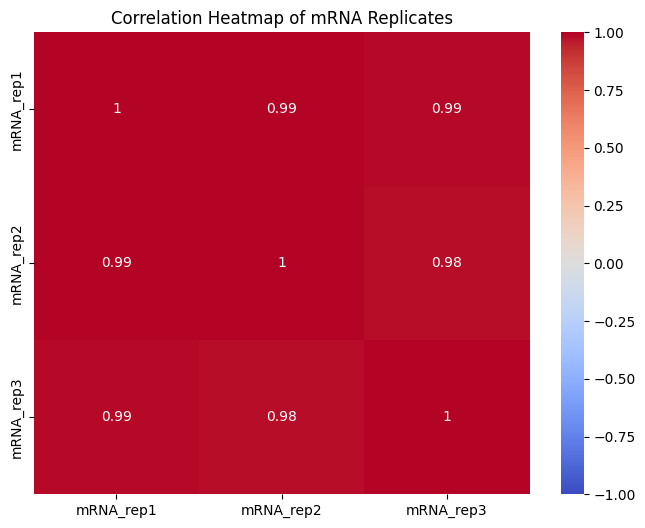

In [18]:
corr_matrix = mRNA_visualization[mRNA_replicate_cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, vmin=-1, vmax=1)

plt.title('Correlation Heatmap of mRNA Replicates')

plt.show()

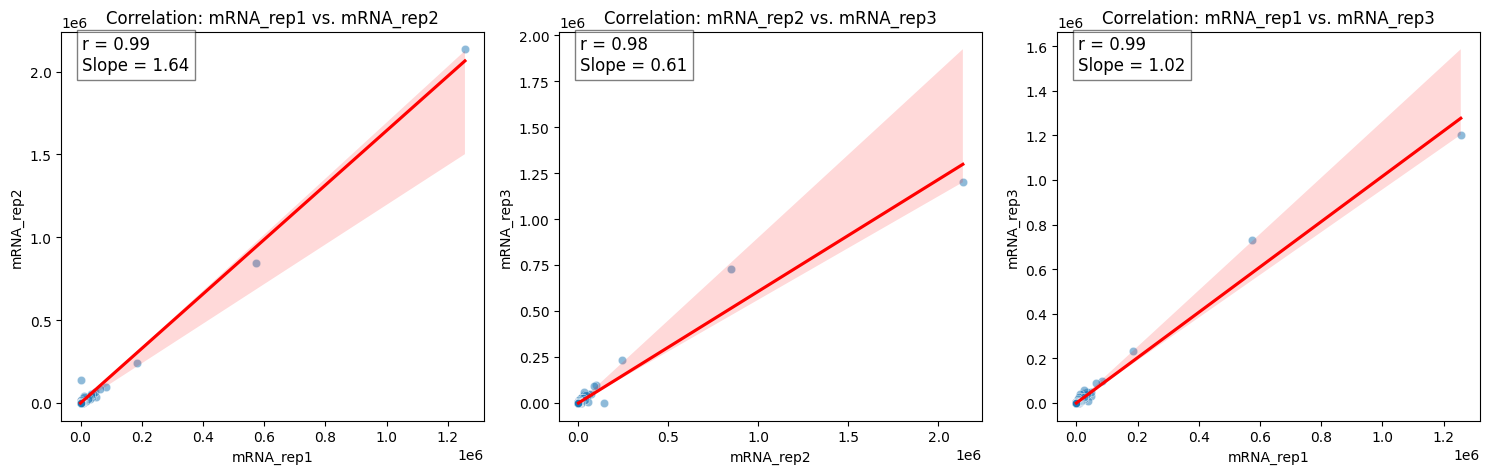

In [19]:
replicate_pairs = [("mRNA_rep1", "mRNA_rep2"), 
                   ("mRNA_rep2", "mRNA_rep3"), 
                   ("mRNA_rep1", "mRNA_rep3")]

plt.figure(figsize=(15, 5))

for i, (rep1, rep2) in enumerate(replicate_pairs, 1):
    plt.subplot(1, 3, i)
    sns.scatterplot(x=mRNA_counts[rep1], y=mRNA_counts[rep2], alpha=0.5)
    
    sns.regplot(x=mRNA_counts[rep1], y=mRNA_counts[rep2], scatter=False, color="red")

    r_value, p_value = stats.pearsonr(mRNA_counts[rep1], mRNA_counts[rep2])
    slope, intercept, _, _, _ = stats.linregress(mRNA_counts[rep1], mRNA_counts[rep2])

    plt.text(0.05, 0.9, f"r = {r_value:.2f}\nSlope = {slope:.2f}", 
             transform=plt.gca().transAxes, fontsize=12, 
             bbox=dict(facecolor='white', alpha=0.5))
    
    plt.xlabel(rep1)
    plt.ylabel(rep2)
    plt.title(f"Correlation: {rep1} vs. {rep2}")

plt.tight_layout()
plt.show()

In [20]:
barcode_mapping

,BC,Freq,Enhancer
0,AAAAAAAACACT,22,RUNX3_RUNX3_RUNX3_2
1,AAAAAAAACGGT,13,MYC_MYC_MYC_MYC_MYC_2
2,AAAAAAAATAAG,25,RUNX3_MYC_2
3,AAAAAAACCGCC,7,PU1_CTCF_1
4,AAAAAAACCGGC,20,MEF2_MEF2_2
...,...,...,...
287431,TTTTTTTTAAAT,103,MYC_PU1_3
287432,TTTTTTTTACAG,91,MYC_MYC_MYC_2
287433,TTTTTTTTATAC,123,FOXO_MYC_FOXO_1
287434,TTTTTTTTCGTT,116,PU1_IRF_PU1_3


In [27]:
# filtering to keep only barcodes with a total count of 10 across all replicates, and this 10 must come from at least 2 replicates, so 12 0 0 isn't allowed

replicate_columns = ['gDNA_rep1', 'gDNA_rep2', 'gDNA_rep3']

# compute total counts per barcode
gDNA_counts['total_counts'] = gDNA_counts[replicate_columns].sum(axis=1)

# how many replicates contribute to the total
gDNA_counts['nonzero_replicates'] = (gDNA_counts[replicate_columns] > 0).sum(axis=1)

# total count ≥ 100 and at least 2 replicates contribute
gDNA_counts_filtered = gDNA_counts[(gDNA_counts['total_counts'] >= 100) & (gDNA_counts['nonzero_replicates'] >= 2)]

gDNA_counts_filtered = gDNA_counts_filtered.drop(columns=['total_counts', 'nonzero_replicates'])


In [28]:
gDNA_counts_filtered

,sequence,gDNA_rep1,gDNA_rep2,gDNA_rep3
14,AGTACTGAAGGC,133,220,146
15,CGTTTCAGGTAT,67,171,153
16,CTGTGTTTCAAT,279,40,416
17,GACATACATCTG,566,470,182
18,AAAACGATACCG,47,128,393
...,...,...,...,...
249501,TGGACAGTCGCG,0,1,208
249671,CTAAGTACCTAT,0,1,195
254357,TAATCCCCCCGT,0,1,217
254771,TACCAAAAATCC,0,1,114


In [29]:
# let's see how many intersect
print(len(set(gDNA_counts_filtered['sequence']) & set(mRNA_counts['sequence'])))

12490


In [30]:
barcode_counts = pd.merge(gDNA_counts_filtered, mRNA_counts, on='sequence')

In [31]:
barcode_counts
# indeed, the correct number of intersected barcodes found in both gDNA and mRNA

,sequence,gDNA_rep1,gDNA_rep2,gDNA_rep3,mRNA_rep1,mRNA_rep2,mRNA_rep3
0,CTGTGTTTCAAT,279,40,416,974,262,0
1,TAGGTCTCTAAA,352,26,655,1267,0,653
2,CTCACATCCGCA,137,26,765,0,400,684
3,GGTATAATTCGT,409,236,588,272,0,549
4,ACTACGTCCGGG,78,62,271,2636,439,944
...,...,...,...,...,...,...,...
12485,GTTACTATACGT,0,1,136,0,523,0
12486,TATAACCAAGAC,0,1,133,130,570,0
12487,TGGACAGTCGCG,0,1,208,0,0,224
12488,CTAAGTACCTAT,0,1,195,0,1,0


In [32]:
# for any mRNA_replicate{i} and gDNA_replicate{i}, if the mRNA value is > 0 and the gDNA value is = 0, set the mRNA value = 0

for i in range(1, 4): # looping over the replicate columns
    gDNA_col = f"gDNA_rep{i}"
    mRNA_col = f"mRNA_rep{i}"
    
    # If gDNA is 0 but mRNA is positive, set mRNA to 0
    barcode_counts.loc[barcode_counts[gDNA_col] == 0, mRNA_col] = 0

In [33]:
barcode_counts

,sequence,gDNA_rep1,gDNA_rep2,gDNA_rep3,mRNA_rep1,mRNA_rep2,mRNA_rep3
0,CTGTGTTTCAAT,279,40,416,974,262,0
1,TAGGTCTCTAAA,352,26,655,1267,0,653
2,CTCACATCCGCA,137,26,765,0,400,684
3,GGTATAATTCGT,409,236,588,272,0,549
4,ACTACGTCCGGG,78,62,271,2636,439,944
...,...,...,...,...,...,...,...
12485,GTTACTATACGT,0,1,136,0,523,0
12486,TATAACCAAGAC,0,1,133,0,570,0
12487,TGGACAGTCGCG,0,1,208,0,0,224
12488,CTAAGTACCTAT,0,1,195,0,1,0


In [34]:
mapped_barcodes = pd.merge(barcode_counts, barcode_mapping[['BC', 'Enhancer']], left_on='sequence', right_on='BC', how='inner')

mapped_barcodes.drop(columns=['BC'], inplace=True)

In [35]:
mapped_barcodes

,sequence,gDNA_rep1,gDNA_rep2,gDNA_rep3,mRNA_rep1,mRNA_rep2,mRNA_rep3,Enhancer
0,CTCACATCCGCA,137,26,765,0,400,684,MEF2_RUNX3_MEF2_1
1,ACTACGTCCGGG,78,62,271,2636,439,944,IRF_MEF2_IRF_3
2,TCATATCCGTTA,164,1,0,389,597,0,NFKB_MYC_NFKB_3
3,AGGATTACATGC,216,2,216,0,441,937,NFKB_NFKB_NFKB_1
4,ACTGTGTACAGT,163,19,0,291,0,0,NFKB_RUNX3_NFKB_3
...,...,...,...,...,...,...,...,...
8864,AATGCCGGCGTG,0,2,152,0,0,626,IRF_IRF_3
8865,GTTACTATACGT,0,1,136,0,523,0,PU1_MEF2_PU1_2
8866,TATAACCAAGAC,0,1,133,0,570,0,IRF_MEF2_IRF_3
8867,CTAAGTACCTAT,0,1,195,0,1,0,FOXO_1
